<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<div align=center>
			<font face="IranNastaliq" size=30>
				<p></p>
				<p></p>
به نام خدا
				<p></p>
			</font>
			<font color=#FF7500>
دانشگاه صنعتی شریف - دانشکده مهندسی کامپیوتر
            </font>
			<p></p>
			<font color=blue>
هوش مصنوعی
            </font>
			<br />
			<br />
پاییز ۱۳۹۹
		</div>
		<div align=center>
		    <font color=#FF7500 size=6>
			    <br />
تمرین دوم، بخش دوم
                سوال عملی
            	<br/>
			</font>
        </div>
        <br/>
        <div align=center>
            نام و نام خانوادگی: سارا رجب زاده
            <br/>
            شماره دانشجویی: 
        </div>
	</font>
    <hr/>
</div>

<div style="direction:rtl;line-height:300%;">
    <font face="XB Zar" size=5>
		برای این تمرین تعدادی تابع و کد داده شده، که با کامل کردن توابع باید پیاد‌سازی را انجام دهید. ابتدا لایبرری‌های لازم را وارد می‌کنیم. 
	</font>
</div>

In [12]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

<div style="direction:rtl;line-height:300%;">
    <font face="XB Zar" size=5>
		اکنون تصاویر را خوانده و نمایش می‌دهیم. تصویر پایین سمت راست عکس اصلی بوده و تصویر سمت چپ عکس پس از عبور از فیلتر است. تصویر ورودی یک عکس $128\times 128$ و تصویر خروجی یک عکس $126\times 126$ بوده. 
	</font>
</div>

[[104 138 144 ...  46  48  46]
 [116  94 112 ...  47  31  36]
 [142 103  91 ...  46  58  34]
 ...
 [191 192 188 ... 136 109 111]
 [196 192 183 ... 117 121 103]
 [194 197 191 ... 121 118  94]]
[[48 60 72 ... 32 22 14]
 [52 47 62 ... 15 23 28]
 [53 46 57 ... 16 15 14]
 ...
 [94 97 95 ... 63 71 58]
 [96 95 94 ... 67 68 54]
 [96 92 95 ... 74 56 62]]


[]

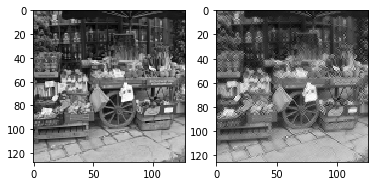

In [13]:
img_src = cv2.imread('data/image.png', cv2.IMREAD_GRAYSCALE)
img_dst = cv2.imread('data/result.png', cv2.IMREAD_GRAYSCALE)
print(img_src)
print(img_dst)
_, axarr = plt.subplots(1,2)
axarr[0].imshow(img_src, cmap='gray')
axarr[1].imshow(img_dst, cmap='gray')
plt.plot()

<div style="direction:rtl;line-height:300%;">
    <font face="XB Zar" size=5>
        در این بخش، شما باید تابع preprocess را پیاده‌سازی کنید. این تابع به عنوان ورودی دو ماتریس بدست آمده در کد بالا را می‌گیرد. این تابع به کمک ماتریس اول یک ماتریس $126^2 \times 9$  (ماتریس $A$) ایجاد کرده و ماتریس تصویر دوم را به یک بردار $126^2$ (بردار $y$) تبدیل می‌کند و به عنوان خروجی می‌دهد. این ماتریس و بردار باید به‌گونه‌ای باشند که اگر وزن‌های فیلتر را به صورت بردار $w$ در نظر بگیریم، آنگاه داریم: $Aw = y$ 
	</font>
</div>

In [16]:
def preprocess(img_src, img_dst):
    
    A = np.zeros((126**2,9))
    y = np.zeros(126**2)
    temp1 = -1
    for i1 in range(126):
        for j1 in range(126):
            temp1+=1
            temp2 = -1
            for i2 in range(i1,i1+3):
                for j2 in range(j1,j1+3):
                    temp2 +=1
                    A[temp1,temp2] = img_src[i2,j2]
    temp = -1
    for i in range(126):
        for j in range(126):
            temp+=1
            y[temp] = img_dst[i,j]
    
                
    
    
    return A, y

A , y =preprocess(img_src,img_dst)

<div style="direction:rtl;line-height:300%;">
    <font face="XB Zar" size=5>
        اکنون در تابع زیر باید الگوریتم Gradient Decent را برای تابع $||Aw-y||^2_{2}$ پیاده سازی کنید.	</font>
</div>

In [53]:
import math
def GD(A, y):
    
    w = np.zeros(9)
    res = np.dot(A,w)
    loss1 = 0
    for i in range(126**2):
        loss1+= (res[i]-y[i])**2
    loss1 = math.sqrt(loss1)
    loss=[0]
    loss += [loss1]
    alpha = 0.0000000001
    loss2 = 0
    print(loss)
    index = 0
    while abs(loss[index+1] - loss[index])>=10**(-5):
        index +=1
        sum2 = 0
        w2 = np.zeros(9)
        for i in range(126**2):
            sum2+=(np.inner(A[i],w)-y[i])*A[i][0]
        w2[0] = sum2
    
        sum2 = 0
        w2 = np.zeros(9)
        for i in range(126**2):
            sum2+=(np.inner(A[i],w)-y[i])*A[i][1]
        w2[1] = sum2
    
        sum2 = 0
        w2 = np.zeros(9)
        for i in range(126**2):
            sum2+=(np.inner(A[i],w)-y[i])*A[i][2]
        w2[2] = sum2
    
        sum2 = 0
        w2 = np.zeros(9)
        for i in range(126**2):
            sum2+=(np.inner(A[i],w)-y[i])*A[i][3]
        w2[3] = sum2
    
        sum2 = 0
        w2 = np.zeros(9)
        for i in range(126**2):
            sum2+=(np.inner(A[i],w)-y[i])*A[i][4]
        w2[4] = sum2
    
        sum2 = 0
        w2 = np.zeros(9)
        for i in range(126**2):
            sum2+=(np.inner(A[i],w)-y[i])*A[i][5]
        w2[5] = sum2
    
        sum2 = 0
        w2 = np.zeros(9)
        for i in range(126**2):
            sum2+=(np.inner(A[i],w)-y[i])*A[i][6]
        w2[6] = sum2
    
        sum2 = 0
        w2 = np.zeros(9)
        for i in range(126**2):
            sum2+=(np.inner(A[i],w)-y[i])*A[i][7]
        w2[7] = sum2
    
        sum2 = 0
        w2 = np.zeros(9)
        for i in range(126**2):
            sum2+=(np.inner(A[i],w)-y[i])*A[i][8]
        w2[8] = sum2
        
        wjadid = w - 2*alpha*w2
        
        loss2 = 0
        res = np.dot(A,wjadid)
        for i in range(126**2):
            loss2+= (res[i]-y[i])**2
        loss2 = math.sqrt(loss2)
        loss += [loss2]
        print(abs(loss[index+1] - loss[index]))
        w = wjadid
    

    return wjadid

GD(A,y)

[0, 7553.933941993403]
334.3807345569294
317.4427387371252
301.2655154442564
285.81258002571394
271.0493522949737
256.94309161739875
243.46283612639127
230.57934545981698
218.2650463150212
206.49398002780708
195.24175128611114
184.48547700241033
174.20373430335894
164.37650654963818
154.98512629985726
146.01221417447096
137.44161268587368
129.25831427463845
121.44838303986808
113.99886997443991
106.89772189860014
100.13368472117463
93.69620211392566
87.57531113832783
81.76153677309685
76.24578762295141
71.01925530504923
66.07332008573349
61.39946525322921
56.98920246731859
52.834009925692044
48.92528466698741
45.254309722793096
41.81223618479271
38.59007962147598
35.578729701263455
32.768971400184
30.151515815693983
27.717038390101607
25.456222267769135
23.359804557672305
21.418623430257412
19.623664216956513
17.966102976229195
16.43734631315965
15.029066569102724
13.73323180926991
12.542130321034165
11.44838957762613
10.444989822866546
9.525272585382027
8.682944542992345
7.91207722911

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.47458597])

<div style="direction:rtl;line-height:300%;">
    <font face="XB Zar" size=5>
        توابع گفته شده را باید به‌گونه‌ای پیاده سازی کنید که با اجرای کد ماتریس وزن‌های فیلتر بدست آید.
	</font>
</div>

In [54]:
A, y = preprocess(img_src, img_dst)
w = GD(A, y)
w = w.reshape((3,3))
print(w)

[0, 7553.933941993403]
334.3807345569294
317.4427387371252
301.2655154442564
285.81258002571394
271.0493522949737
256.94309161739875
243.46283612639127
230.57934545981698
218.2650463150212
206.49398002780708
195.24175128611114
184.48547700241033
174.20373430335894
164.37650654963818
154.98512629985726
146.01221417447096
137.44161268587368
129.25831427463845
121.44838303986808
113.99886997443991
106.89772189860014
100.13368472117463
93.69620211392566
87.57531113832783
81.76153677309685
76.24578762295141
71.01925530504923
66.07332008573349
61.39946525322921
56.98920246731859
52.834009925692044
48.92528466698741
45.254309722793096
41.81223618479271
38.59007962147598
35.578729701263455
32.768971400184
30.151515815693983
27.717038390101607
25.456222267769135
23.359804557672305
21.418623430257412
19.623664216956513
17.966102976229195
16.43734631315965
15.029066569102724
13.73323180926991
12.542130321034165
11.44838957762613
10.444989822866546
9.525272585382027
8.682944542992345
7.91207722911